In [472]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [473]:
df = pd.read_csv('/kaggle/input/heart-diseaseuci/heart.csv')

In [474]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [475]:
x =df.drop(columns=['target'])
y=df['target']
print(x.shape)
print(y.shape)


(303, 13)
(303,)


In [476]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,stratify=y)


In [477]:
print(x_train.shape)
print(x_test.shape)

(227, 13)
(76, 13)


In [478]:

from sklearn.tree import DecisionTreeClassifier
clf =tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

[Text(0.5444444444444444, 0.9444444444444444, 'thal <= 2.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]\nclass = heart disease'),
 Text(0.31666666666666665, 0.8333333333333334, 'cp <= 0.5\ngini = 0.368\nsamples = 136\nvalue = [33, 103]\nclass = heart disease'),
 Text(0.2, 0.7222222222222222, 'exang <= 0.5\ngini = 0.5\nsamples = 48\nvalue = [24, 24]\nclass = not heart disease'),
 Text(0.1111111111111111, 0.6111111111111112, 'ca <= 0.5\ngini = 0.4\nsamples = 29\nvalue = [8, 21]\nclass = heart disease'),
 Text(0.044444444444444446, 0.5, 'thalach <= 96.5\ngini = 0.18\nsamples = 20\nvalue = [2, 18]\nclass = heart disease'),
 Text(0.022222222222222223, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = not heart disease'),
 Text(0.06666666666666667, 0.3888888888888889, 'chol <= 316.0\ngini = 0.1\nsamples = 19\nvalue = [1, 18]\nclass = heart disease'),
 Text(0.044444444444444446, 0.2777777777777778, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]\nclass = heart disease'),
 T

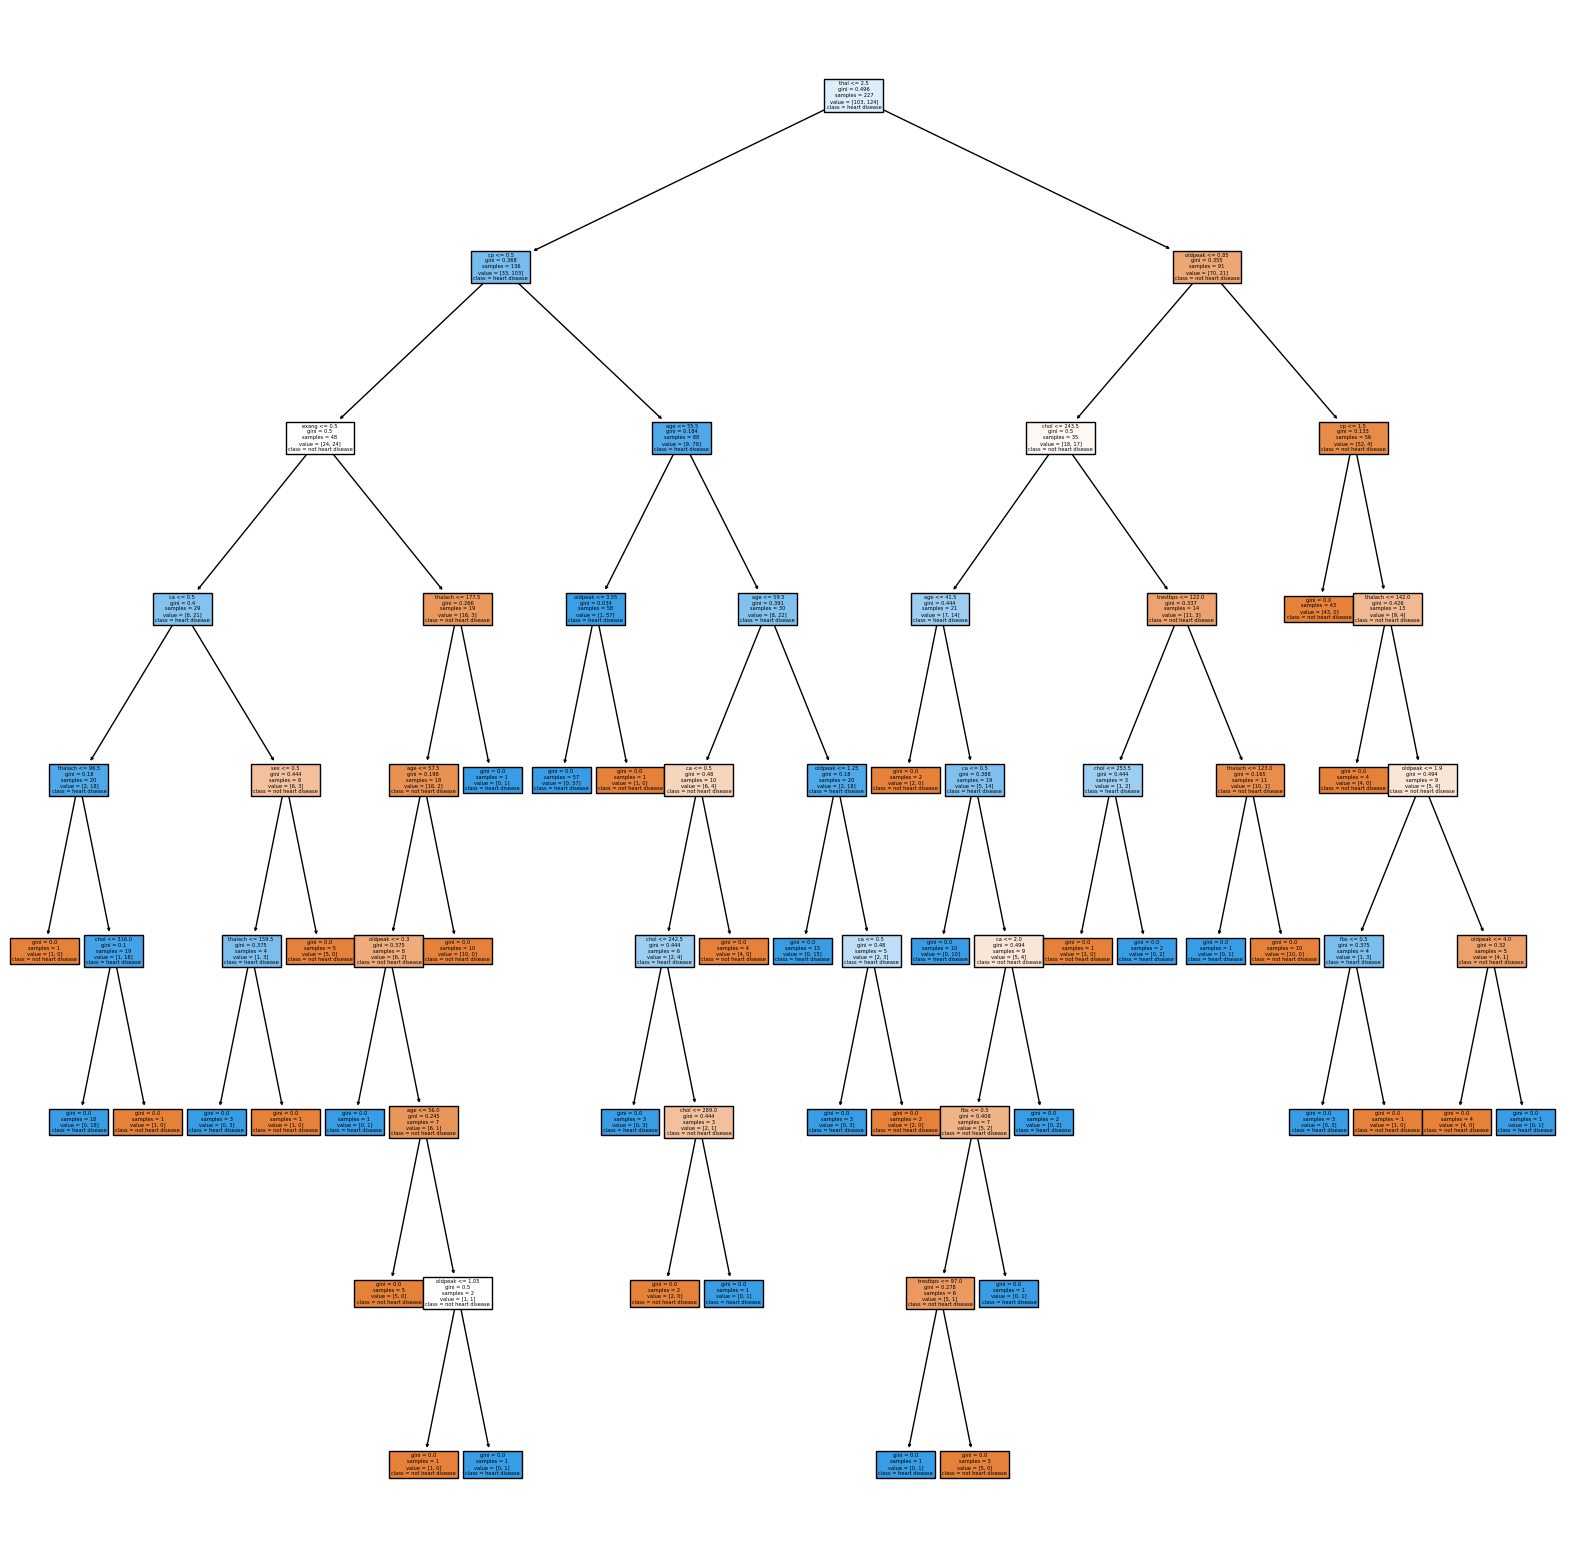

In [479]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['not heart disease','heart disease']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)

In [480]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
    

Train score 1.0
Test score 0.7631578947368421
Train Confusion matrix


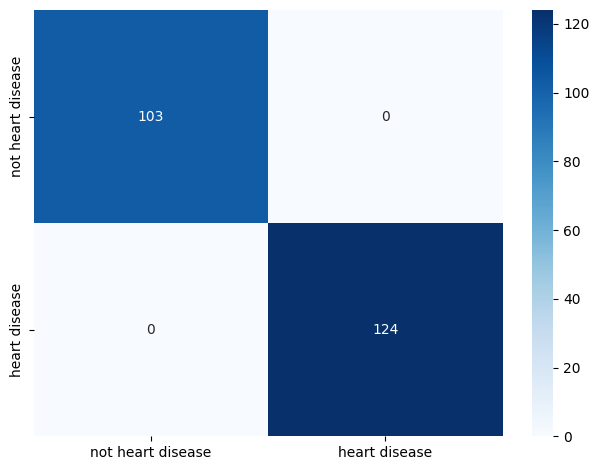

Test Confusion matrix


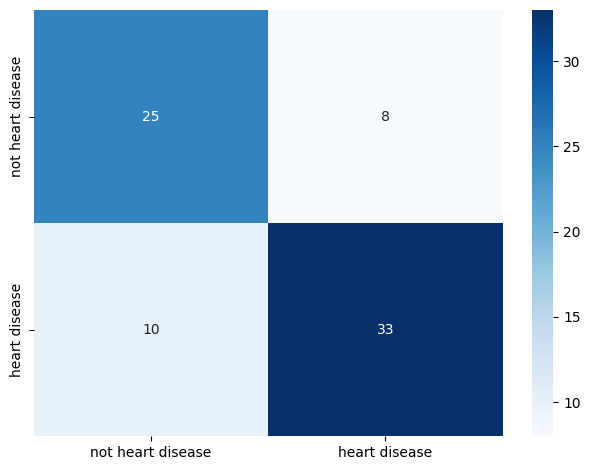

In [481]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [482]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.9515418502202643
Test score 0.7763157894736842
Train Confusion matrix


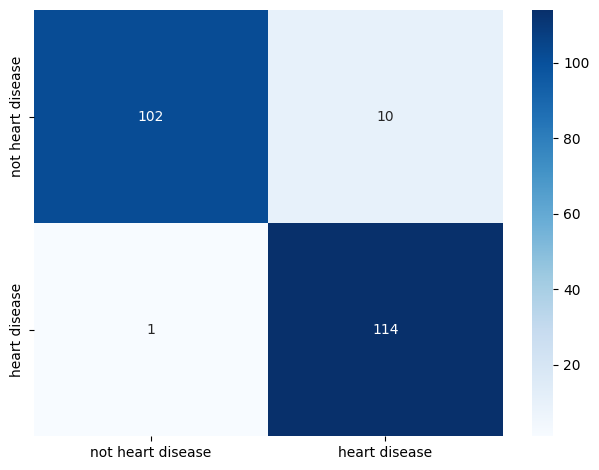

Test Confusion matrix


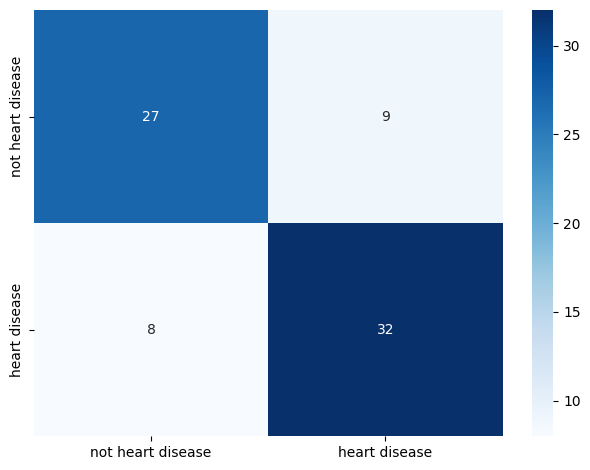

In [483]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

<function matplotlib.pyplot.show(close=None, block=None)>

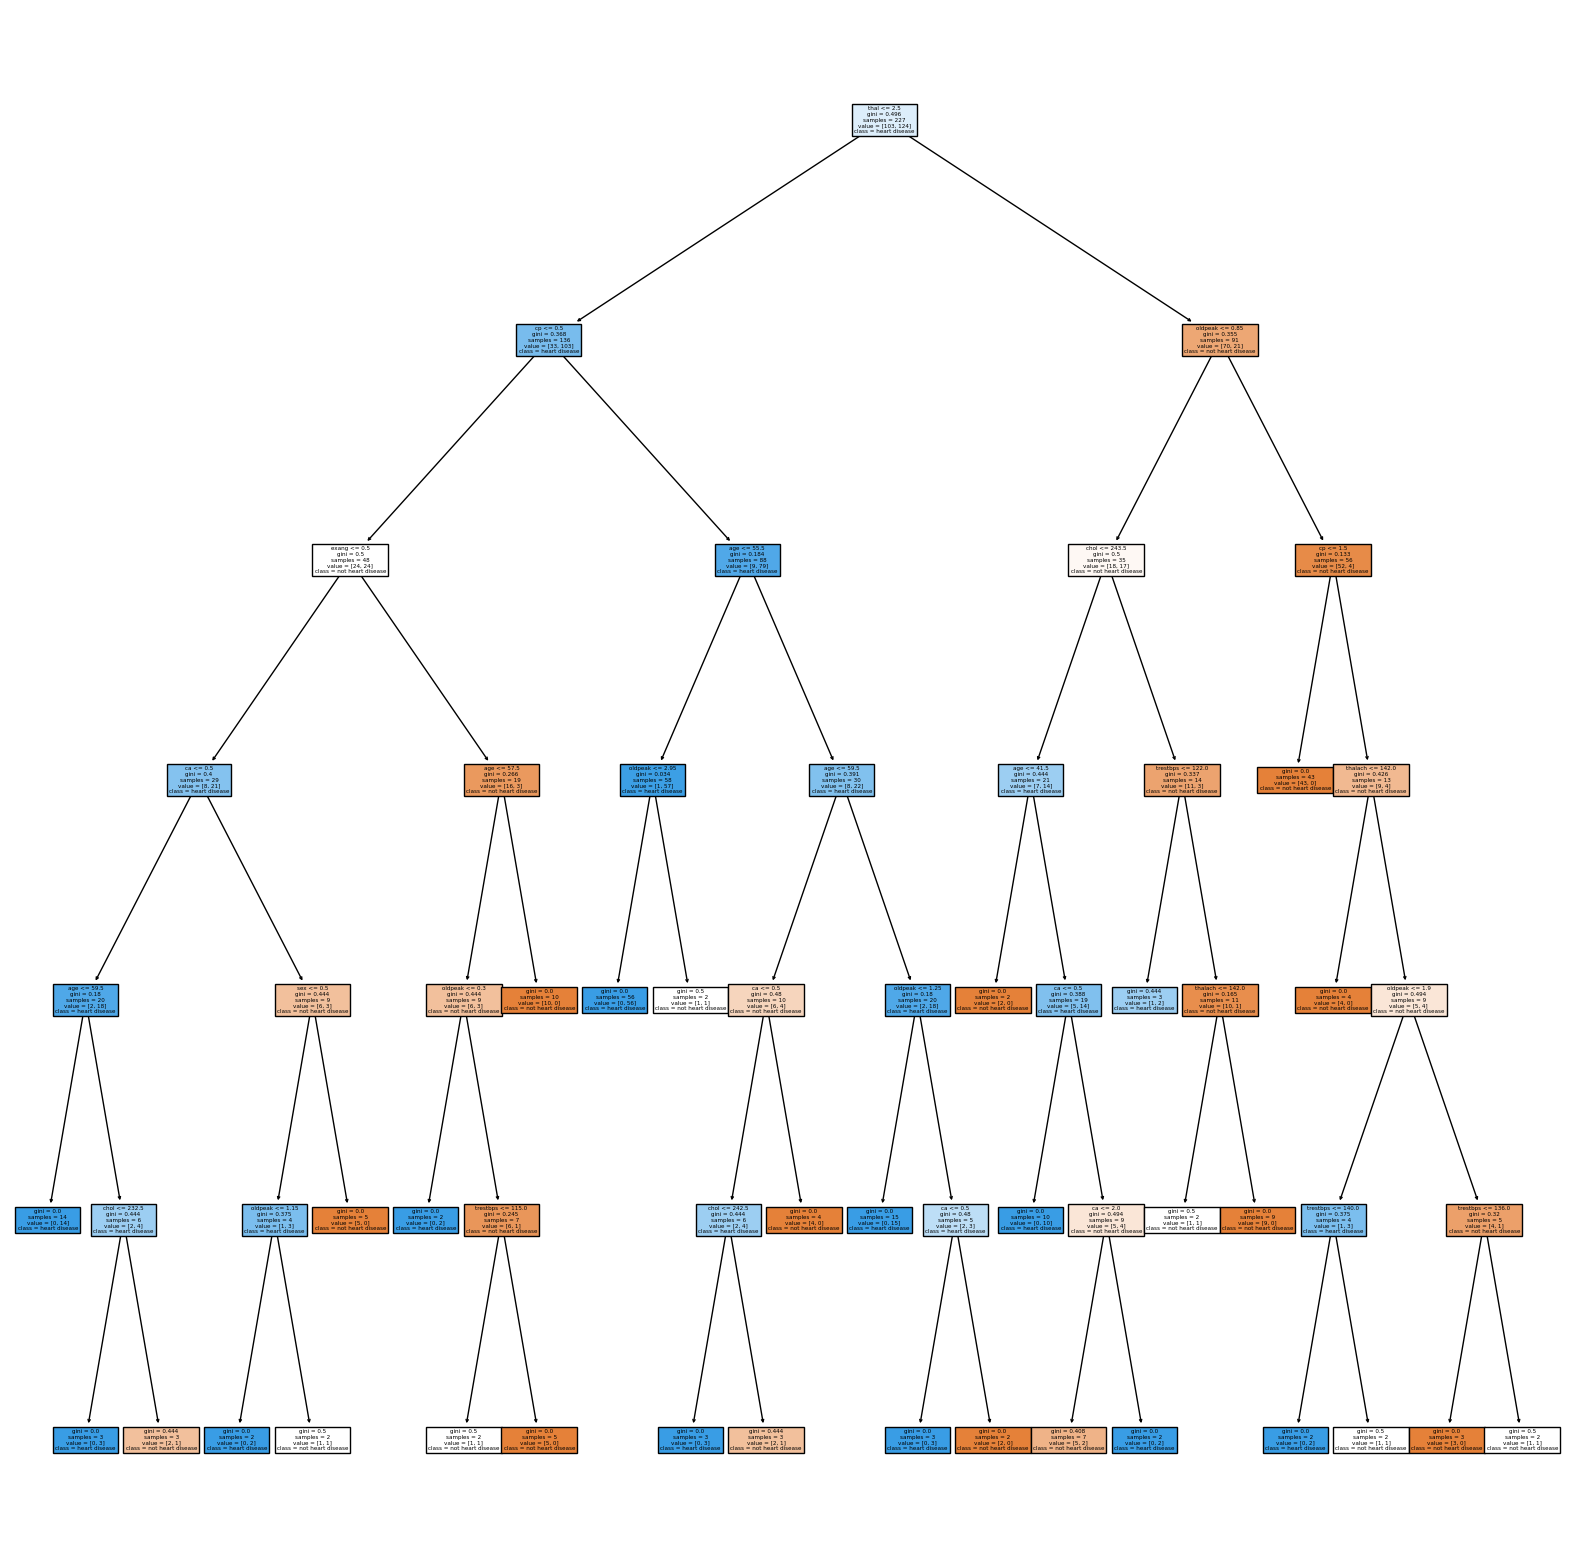

In [484]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['not heart disease','heart disease']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show

In [485]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00377596 0.00405566 0.00587372 0.00587372 0.00609963
 0.00629327 0.00659505 0.00660793 0.00699252 0.00744703 0.00792952
 0.00792952 0.00832648 0.00865867 0.00939794 0.01076848 0.01101322
 0.01276118 0.01514579 0.01756038 0.03242802 0.03257007 0.04328724
 0.13319669]


In [486]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

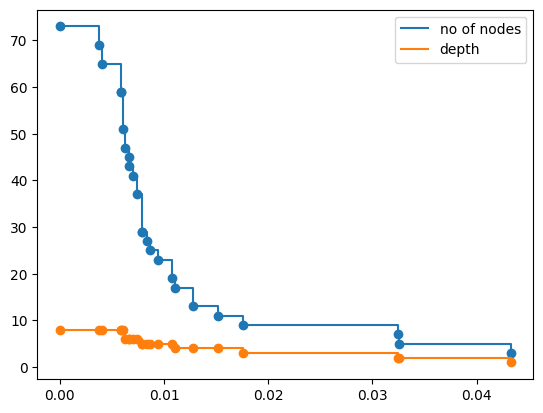

In [487]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

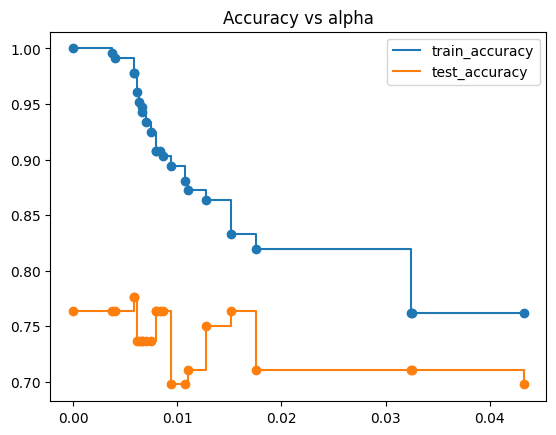

In [488]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8193832599118943
Test score 0.7105263157894737
Train Confusion matrix


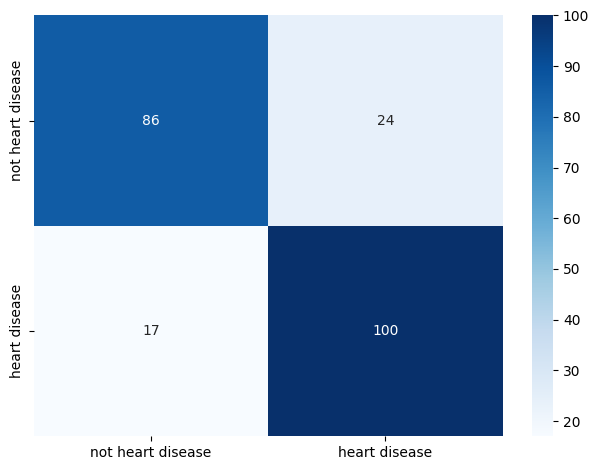

Test Confusion matrix


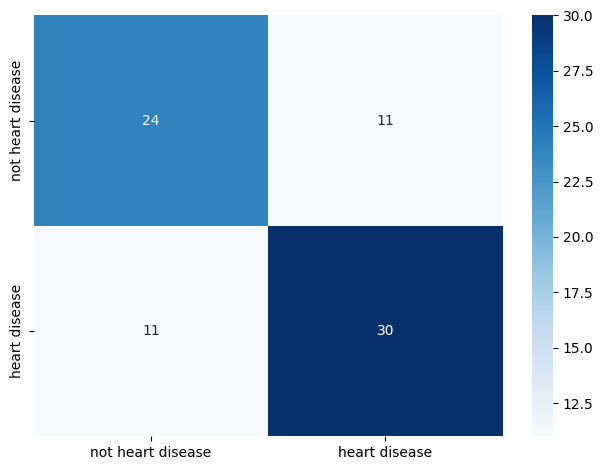

In [489]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

[Text(0.5555555555555556, 0.875, 'thal <= 2.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]\nclass = heart disease'),
 Text(0.3333333333333333, 0.625, 'cp <= 0.5\ngini = 0.368\nsamples = 136\nvalue = [33, 103]\nclass = heart disease'),
 Text(0.2222222222222222, 0.375, 'exang <= 0.5\ngini = 0.5\nsamples = 48\nvalue = [24, 24]\nclass = Not heart disease'),
 Text(0.1111111111111111, 0.125, 'gini = 0.4\nsamples = 29\nvalue = [8, 21]\nclass = heart disease'),
 Text(0.3333333333333333, 0.125, 'gini = 0.266\nsamples = 19\nvalue = [16, 3]\nclass = Not heart disease'),
 Text(0.4444444444444444, 0.375, 'gini = 0.184\nsamples = 88\nvalue = [9, 79]\nclass = heart disease'),
 Text(0.7777777777777778, 0.625, 'oldpeak <= 0.85\ngini = 0.355\nsamples = 91\nvalue = [70, 21]\nclass = Not heart disease'),
 Text(0.6666666666666666, 0.375, 'gini = 0.5\nsamples = 35\nvalue = [18, 17]\nclass = Not heart disease'),
 Text(0.8888888888888888, 0.375, 'gini = 0.133\nsamples = 56\nvalue = [52, 4]\nclass = Not he

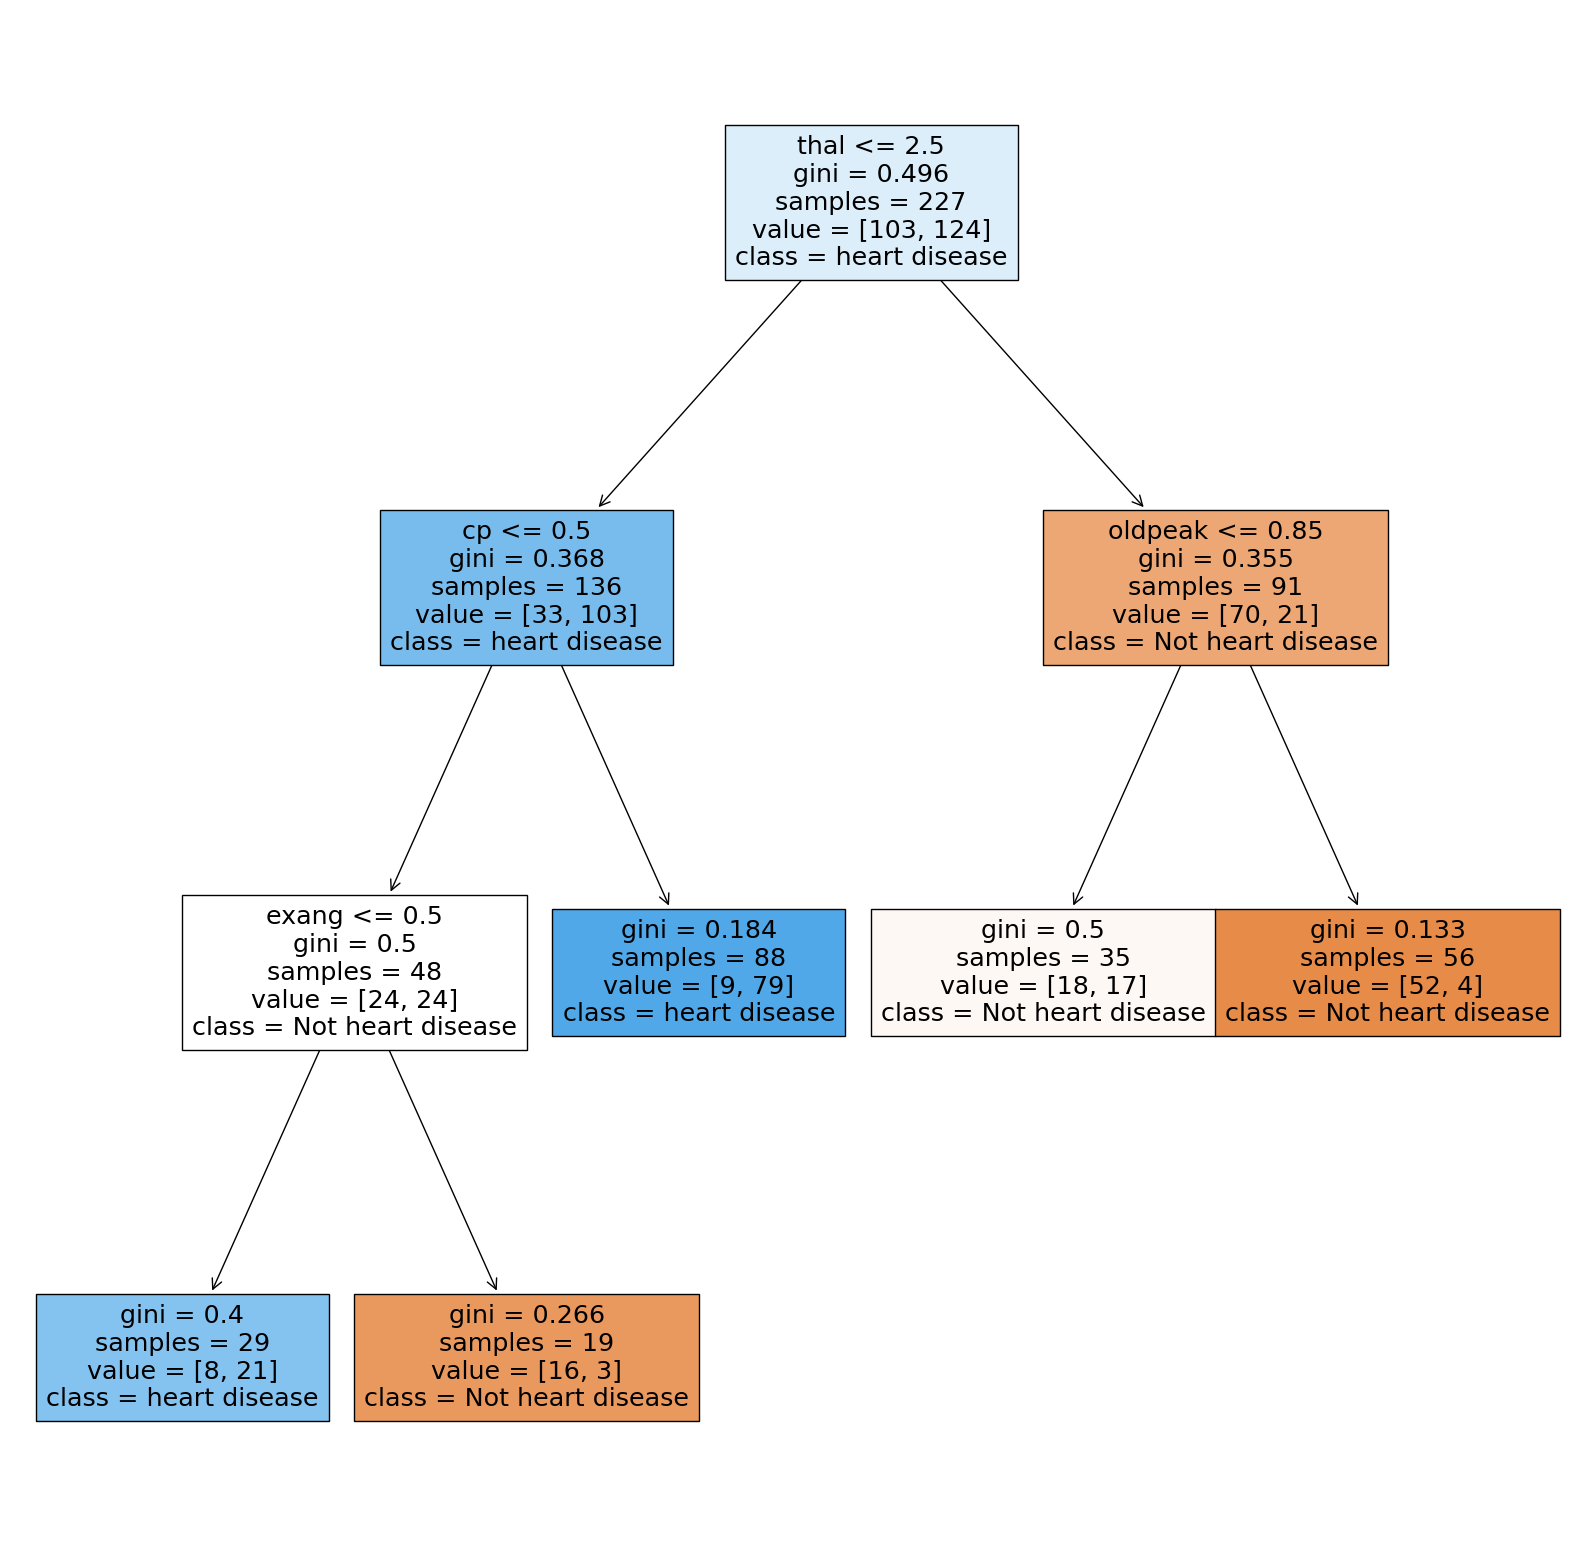

In [490]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
